będziemy korzystać z biblioteki networkx albo igraph<br>
model CB będziemy implementować i też graf erdosa-renyi'ego
# TO DO
ogarnąć raport <br>
zrobić demand indywidualny, mamy taki co jest całych komponentów <br>
zrobić te wykresy co napisał na teams <br>

# IGRAPH
ogólnie brzmi na trochę bardziej zaawansowany, może trochę trudniejszy ale mocniejszy dokumentacja - [o tu](https://igraph.org/) <br>
## Przydatne komendy

In [ ]:
#!pip install igraph #to trzeba bo inaczej nie będzie widział igraph, bo nie jest w google colab ta biblioteka

In [ ]:
#import igraph as ig

In [ ]:
#g = ig.Graph()
#print(g)

# NETWORKX
dokumentacja - [tu](https://networkx.org/documentation/stable/tutorial.html)<br>
tutorial na yt - [introduction to networkx in python](https://www.youtube.com/watch?v=flwcAf1_1RU)<br>
coś o Erdos-Renyi - [tu](https://networkx.org/documentation/stable/auto_examples/graph/plot_erdos_renyi.html#sphx-glr-auto-examples-graph-plot-erdos-renyi-py)
## Przydatne komendy
creating graphs:
`nx.barabasi_albert_graph(x,y)` <br>
`nx.draw_spring(x)` <br>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from datetime import datetime

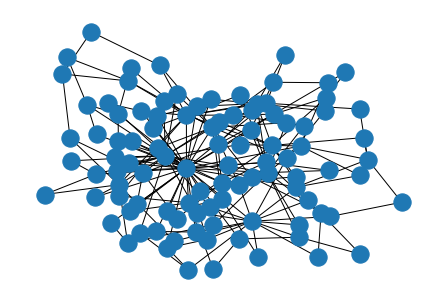

In [ ]:
G = nx.barabasi_albert_graph(100,2)
nx.draw_spring(G)

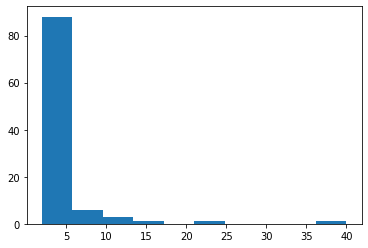

In [ ]:
#degree distribution
plt.hist([v for k,v in nx.degree(G)]);

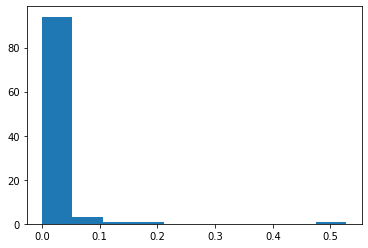

In [ ]:
#Centrality
plt.hist(nx.centrality.betweenness_centrality(G).values());

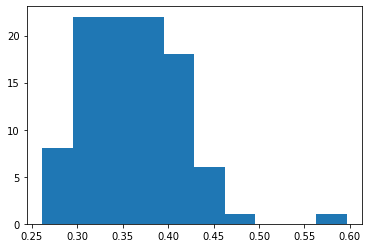

In [ ]:
#closeness centrality
plt.hist(nx.centrality.closeness_centrality(G).values());

In [ ]:
#diameter (highest number of hops between nobs)
nx.diameter(G)

6

In [ ]:
#average clustering (if a is connected to b and b to c, what's the possiblity that c is also connected to a)
nx.cluster.average_clustering(G)

0.17944232217058304

node degree clustering
0 1 0
1 3 0
2 1 0
3 1 0
4 2 0
5 1 0
6 0 0
7 1 0
8 2 0
9 2 0

the adjacency list
0 8
1 2 4 9
2
3 9
4 7
5 8
6
7
8
9


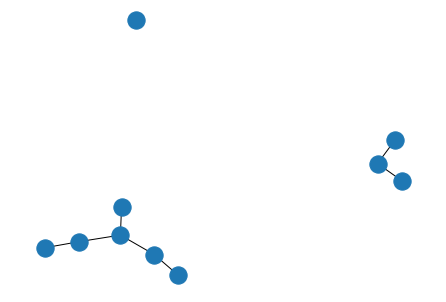

In [ ]:
#Erdos-Renyi from here https://networkx.org/documentation/stable/auto_examples/graph/plot_erdos_renyi.html#sphx-glr-auto-examples-graph-plot-erdos-renyi-py
import matplotlib.pyplot as plt
import networkx as nx
#ER - E,N

n = 10  # 10 nodes
m = 7  # 20 edges
seed = 20160  # seed random number generators for reproducibility

# Use seed for reproducibility
G = nx.gnm_random_graph(n, m, seed=seed)

# some properties
print("node degree clustering")
for v in nx.nodes(G):
    print(f"{v} {nx.degree(G, v)} {nx.clustering(G, v)}")

print()
print("the adjacency list")
for line in nx.generate_adjlist(G):
    print(line)

pos = nx.spring_layout(G, seed=seed)  # Seed for reproducible layout
nx.draw(G, pos=pos)
plt.show()






agregate excess after many iterations equals 175
<class 'dict_values'>


Text(0, 0.5, 'liczba zliczeń')

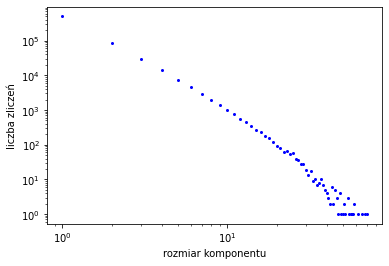

In [ ]:
#different ER https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html
#ER - n, p
n = 1000; #number of nodes
c = 0.7
p = c/n; #probability of edge creation
ile_symulacji = 1000



parametry = []#list of parameters for each generated graph
param1 = []#parametrs of one ER graph
array1 = []
for j in range(ile_symulacji):
  ER = nx.erdos_renyi_graph(n,p,random.seed(datetime.now()))
  ilosc  = nx.number_connected_components(ER)#number of components in a single graph
  lista = list(nx.connected_components(ER)) #list of component sizes
  #print(lista)
  #print(ilosc)
  
  for i in range(ilosc):#appeds an array with arrays(creating 2d array), first column is a number of cells in a component, second column is a decision of a component
   rand = random.uniform(0, 1)
   array1.append(len(lista[i]))
   if rand<1/3:
     parametry.append([len(lista[i]), -1])#component sells
   elif(1/3<rand and rand<2/3):
       parametry.append([len(lista[i]), 0])#component does nothing
   else:
       parametry.append([len(lista[i]), 1])#component buys
  #nx.draw_spring(ER)
  ER.clear()

#print("parametry",parametry)

#print("param1",param1)

D= [] #aggregate excess
D_temp = 0
D_sum=0#aggregate excess after may iterations


k=0

#print("array1", array1)

for i in range(len(parametry)):
    D_sum+=parametry[i][0]*parametry[i][1]

#print(array1)
#print(parametry[0])
#print(parametry[1])

#print("agregate excess equals", D)
print("agregate excess after many iterations equals", D_sum)

counts = {}
for n in array1:
    counts[n] = counts.get(n, 0) + 1
#print("counts",counts)

print(type(counts.values()))

x=list(counts.keys())
y=list(counts.values())

plt.plot(x, y, 'o', color='blue', markersize=2);


#plt.bar(x, y, color='b')
#plt.hist(np.log10(list(counts.keys())), log=True, bins=list(counts.values()))
#plt.loglog(list(counts.keys()), list(counts.values()))
plt.yscale('log', nonposy='clip')
plt.xscale('log')
plt.xlabel('rozmiar komponentu')
plt.ylabel('liczba zliczeń')
#plt.show()

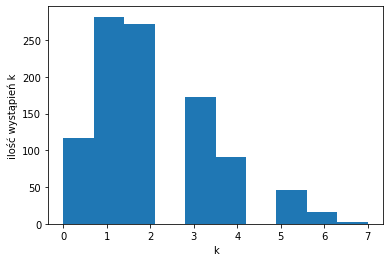

In [ ]:
#degree distribution for ER
ER = nx.erdos_renyi_graph(n,p,random.seed(datetime.now()))
plt.hist([v for k,v in nx.degree(ER)]);
plt.ylabel('ilość wystąpień k');
plt.xlabel('k');

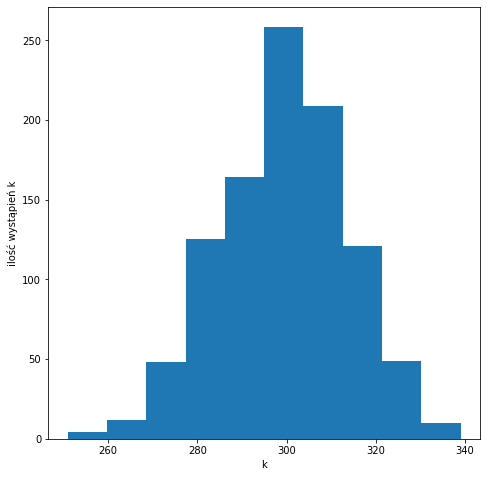

In [ ]:
#maybe faster ER
n = 1000; #number of nodes
p = 0.3; #probability of edge creation
fastER=nx.fast_gnp_random_graph(n,p)
#nx.draw_spring(fastER)
plt.figure(figsize=[6, 6])
plt.hist([v for k,v in nx.degree(fastER)]);
plt.ylabel('ilość wystąpień k');
plt.xlabel('k');
#saving plt to svg
plt.gca().set_position([0, 0, 1, 1])
plt.savefig("khist.svg")

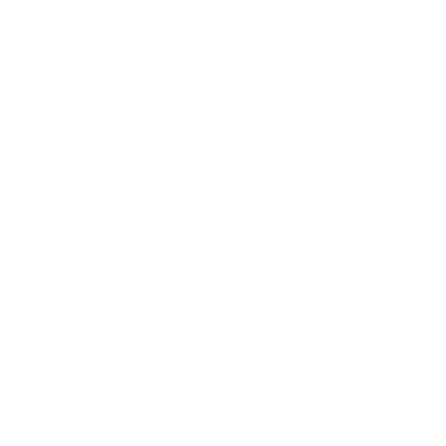

In [ ]:
### Przykład zapisu
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=[6, 6])
x = np.arange(0, 100, 0.00001)
y = x*np.sin(2* np.pi * x)
#plt.plot(y)
plt.axis('off')
plt.gca().set_position([0, 0, 1, 1])
#plt.savefig("test.svg")

# CB model
demand: <br>
$D = ∑_{α = 1}^{n_c} \phi_α W_α$ <br>
method:<br>

number of components is equal to 160
agregate excess equals -32


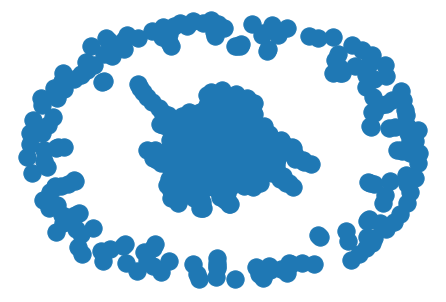

In [ ]:
#C-B model with p and n as parameters
n = 1000; #number of nodes
p = 0.002; #probability of edge creation
CB = nx.erdos_renyi_graph(n,p)
nx.draw_spring(CB)

ilosc  = nx.number_connected_components(CB)#number of components
print("number of components is equal to", ilosc)

lista = list(nx.connected_components(CB)) #list of components with nodes assigned to each of them

array = []#empty array

for i in range(ilosc):#appeds an array with arrays(creating 2d array), first column is a number of cells in a component, second column is a decision of a component
  rand = random.uniform(0, 1)
  if rand<1/3:
    array.append([len(lista[i]), -1])#component sells
  elif(1/3<rand and rand<2/3):
     array.append([len(lista[i]), 0])#component does nothing
  else:
      array.append([len(lista[i]), 1])#component buys

D=0 #aggregate excess

for i in range(ilosc):
  D+=array[i][0]*array[i][1] #increase/decrease D according to parameters of each component

#print(array)

print("agregate excess equals", D)

# Tutaj robimy generację wiele razy


# Sekcja Zuzi

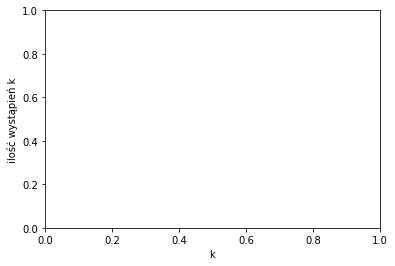

In [ ]:
#TEST CZY UDA SIĘ GENEROWAĆ I ZAPISYWAĆ BEZ TWORZENIA ARRAYU (PLOT TWIST NIE UDAŁO SIĘ ALE DZIAŁA xD)
#degree distribution for ER
ys=[]
n=100
p=0.3
ERpr=nx.fast_gnp_random_graph(n,p);
for i in range(100):
  for k,v in nx.degree(nx.fast_gnp_random_graph(n,p)):
    ys.append(v)
#plt.hist(ys) 
#bins = [0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]
#plt.hist([v for k,v in nx.degree(ERpr)] );
plt.ylabel('ilość wystąpień k');
plt.xlabel('k');
plt.savefig("khist.svg")

### Tutaj miała miejsce próba agregacji różnych generacji

(array([ 78000., 136000., 138500.,      0.,  86000.,  38500.,      0.,
         15500.,   6000.,   1500.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

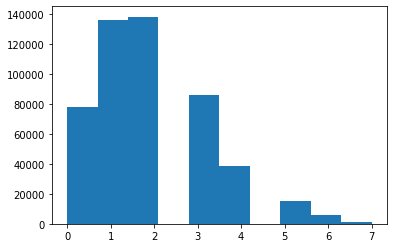

In [ ]:
xs =[]
ys= []
for i in range(500):
  for k,v in nx.degree(ER):
    xs.append(k)
    ys.append(v)
plt.hist(ys)

dla parametrów A zależy od rozmiaru sieci i C te same
rozkłady popytu

A -> im mniejsza sieć tym A musi być większe, bo jest coś takiego jak n_order (w tym herd) flow 2*A*N
n_order = 2aN -> a = 1/(2N) <- dolna granica 0.25 <- górna (ale może za duże ciągle)

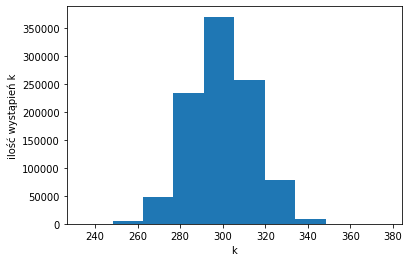

In [ ]:
#TEST CZY UDA SIĘ GENEROWAĆ I ZAPISYWAĆ BEZ TWORZENIA ARRAYU (PLOT TWIST NIE UDAŁO SIĘ ALE DZIAŁA xD)
#degree distribution for ER
ys=[]
n=1000
p=0.3
ERpr=nx.fast_gnp_random_graph(n,p, random.seed(datetime.now()));
for i in range(1000):
  for k,v in nx.degree(nx.fast_gnp_random_graph(n,p, random.seed(datetime.now()))):
    ys.append(v)
plt.hist(ys) 
#bins = [0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]
#plt.hist([v for k,v in nx.degree(ERpr)] );
plt.ylabel('ilość wystąpień k');
plt.xlabel('k');
plt.savefig("khist.svg")

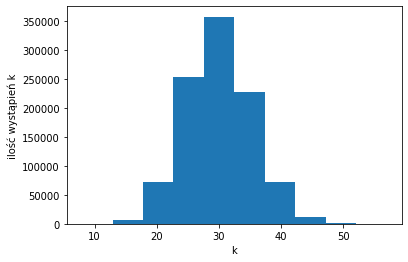

In [ ]:
ys = [];
for i in range(1000):
  ER =nx.erdos_renyi_graph(1000, 0.03)
  ys.extend(list(dict(ER.degree()).values()));
plt.hist(ys)
plt.ylabel('ilość wystąpień k');
plt.xlabel('k');
plt.savefig("khist.svg")